In [1]:
# Importing necessary libraries: Pandas for data manipulation, NumPy for numerical operations
import pandas as pd
import numpy as np

In [2]:
# Reading a CSV file into a Pandas DataFrame, 'teams'
teams = pd.read_csv(r'C:\Users\Shoaib khan\Desktop\teams.csv')

In [3]:
teams

,team,year,athletes,events,age,height,weight,prev_medals,medals
0,AFG,1964,8,8,22.0,161.0,64.2,0.0,0
1,AFG,1968,5,5,23.2,170.2,70.0,0.0,0
2,AFG,1972,8,8,29.0,168.3,63.8,0.0,0
3,AFG,1980,11,11,23.6,168.4,63.2,0.0,0
4,AFG,2004,5,5,18.6,170.8,64.8,0.0,0
...,...,...,...,...,...,...,...,...,...
2009,ZIM,2000,26,19,25.0,179.0,71.1,0.0,0
2010,ZIM,2004,14,11,25.1,177.8,70.5,0.0,3
2011,ZIM,2008,16,15,26.1,171.9,63.7,3.0,4
2012,ZIM,2012,9,8,27.3,174.4,65.2,4.0,0


In [4]:
teams_1= ['events','height','weight']

In [5]:
# Dropping columns specified in 'teams_1' from the 'teams' DataFrame
teams = teams.drop(teams_1, axis=1)

In [6]:
teams

,team,year,athletes,age,prev_medals,medals
0,AFG,1964,8,22.0,0.0,0
1,AFG,1968,5,23.2,0.0,0
2,AFG,1972,8,29.0,0.0,0
3,AFG,1980,11,23.6,0.0,0
4,AFG,2004,5,18.6,0.0,0
...,...,...,...,...,...,...
2009,ZIM,2000,26,25.0,0.0,0
2010,ZIM,2004,14,25.1,0.0,3
2011,ZIM,2008,16,26.1,3.0,4
2012,ZIM,2012,9,27.3,4.0,0


In [7]:
# Select only numeric columns
numeric_columns = teams.select_dtypes(include=np.number)

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Extract the correlation of 'medals' with other columns
correlation_with_medals = correlation_matrix['medals']

# Display the correlation values
print(correlation_with_medals)


year          -0.034870
athletes       0.839909
age            0.023231
prev_medals    0.920048
medals         1.000000
Name: medals, dtype: float64


In [8]:
# Importing visualization libraries: Seaborn for statistical visualizations, Matplotlib for basic plotting
import seaborn as sns
import matplotlib as plt

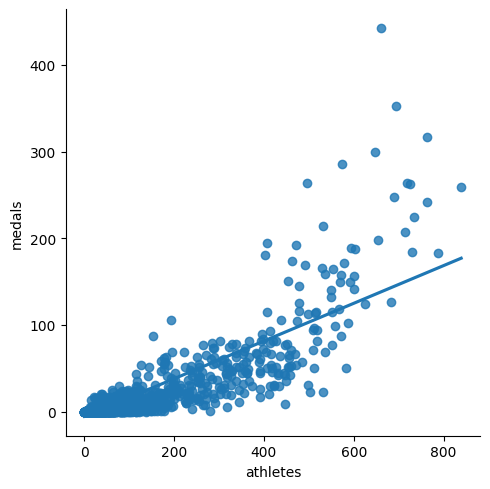

In [9]:
# Creating a scatter plot with a linear regression line using Seaborn's lmplot
sns.lmplot(x='athletes', y='medals', data=teams, fit_reg=True, ci=None)

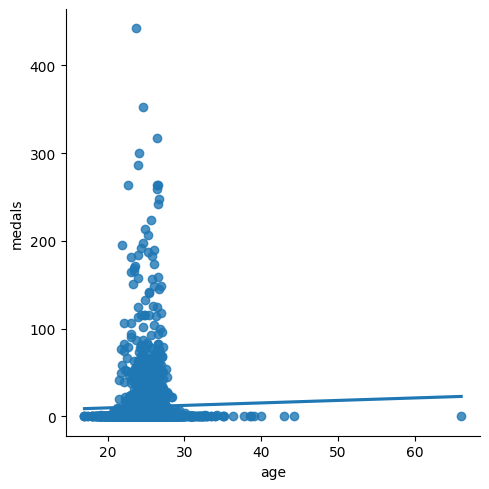

In [10]:
# Creating a scatter plot with a linear regression line for 'age' vs. 'medals' using Seaborn's lmplot
sns.lmplot(x='age', y='medals', data=teams, fit_reg=True, ci=None)


<Axes: ylabel='Frequency'>

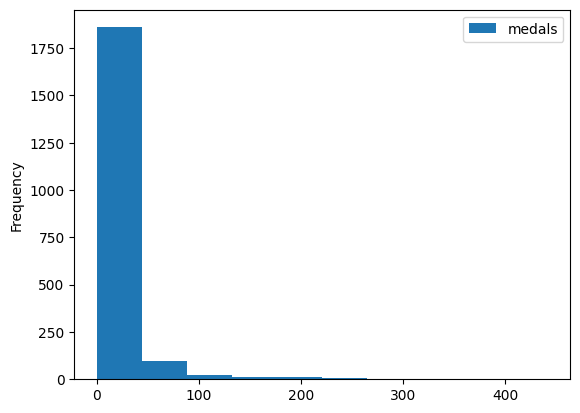

In [11]:
# Creating a histogram for the 'medals' column in the 'teams' DataFrame using Pandas plot
teams.plot.hist(y='medals')

In [12]:
# Finding the missing values 
teams[teams.isnull().any(axis=1)]

,team,year,athletes,age,prev_medals,medals


In [13]:
# Dropping rows with missing values from the 'teams' DataFrame
teams = teams.dropna()

In [14]:
teams

,team,year,athletes,age,prev_medals,medals
0,AFG,1964,8,22.0,0.0,0
1,AFG,1968,5,23.2,0.0,0
2,AFG,1972,8,29.0,0.0,0
3,AFG,1980,11,23.6,0.0,0
4,AFG,2004,5,18.6,0.0,0
...,...,...,...,...,...,...
2009,ZIM,2000,26,25.0,0.0,0
2010,ZIM,2004,14,25.1,0.0,3
2011,ZIM,2008,16,26.1,3.0,4
2012,ZIM,2012,9,27.3,4.0,0


In [15]:
# Creating training and testing sets based on the 'year' column in the 'teams' DataFrame
train = teams[teams['year'] < 2012].copy()
test = teams[teams['year'] >= 2012].copy()

In [16]:
train

,team,year,athletes,age,prev_medals,medals
0,AFG,1964,8,22.0,0.0,0
1,AFG,1968,5,23.2,0.0,0
2,AFG,1972,8,29.0,0.0,0
3,AFG,1980,11,23.6,0.0,0
4,AFG,2004,5,18.6,0.0,0
...,...,...,...,...,...,...
2007,ZIM,1992,28,21.2,0.0,0
2008,ZIM,1996,21,23.8,0.0,0
2009,ZIM,2000,26,25.0,0.0,0
2010,ZIM,2004,14,25.1,0.0,3


In [17]:
test 

,team,year,athletes,age,prev_medals,medals
6,AFG,2012,6,24.8,1.0,1
7,AFG,2016,3,24.7,1.0,0
23,ALB,2012,10,25.7,0.0,0
24,ALB,2016,6,23.7,0.0,0
35,ALG,2012,39,24.8,2.0,1
...,...,...,...,...,...,...
1983,YEM,2016,3,19.3,0.0,0
2001,ZAM,2012,7,22.6,0.0,0
2002,ZAM,2016,7,24.1,0.0,0
2012,ZIM,2012,9,27.3,4.0,0


In [18]:
train.shape

(1609, 6)

In [19]:
test.shape


(405, 6)

In [20]:
# Importing Linear Regression from scikit-learn and initializing a Linear Regression model
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [21]:
# Defining the predictors for the model as 'athletes' and 'prev_medals'
predictors = ['athletes', 'prev_medals']

In [22]:
# Fitting the Linear Regression model using the training data and specified predictors
reg.fit(train[predictors], train['medals'])

LinearRegression()

In [24]:
# Generating predictions using the Linear Regression model on the test data and specified predictors
predictions = reg.predict(test[predictors])

In [25]:
predictions

array([-9.61221245e-01, -1.17633261e+00, -1.42503158e+00, -1.71184673e+00,
        2.15562926e+00,  3.91463636e+00, -1.71184673e+00, -1.85525431e+00,
        3.67563128e-01, -2.77770967e-01, -1.85525431e+00, -1.49673537e+00,
        4.67519911e+01,  2.87550937e+01,  4.58450091e+00,  2.54773581e+00,
       -1.85525431e+00, -1.64014295e+00, -1.85525431e+00, -1.85525431e+00,
        1.46556876e+02,  1.20571799e+02,  6.56314795e+00,  3.95275254e+00,
        7.34283247e+00,  1.03117468e+01,  5.19171882e+00,  3.58517645e+00,
       -1.64014295e+00, -1.64014295e+00, -1.56843916e+00, -1.20992022e+00,
       -1.71184673e+00, -1.42503158e+00,  1.17929959e+01,  1.00049298e+01,
       -1.78355052e+00, -1.71184673e+00, -1.56843916e+00, -1.56843916e+00,
       -1.99866189e+00, -1.99866189e+00, -1.56843916e+00, -1.35332779e+00,
       -1.92695810e+00, -1.92695810e+00,  3.28912706e+01,  2.53042547e+01,
       -1.78355052e+00, -1.28162400e+00, -1.85525431e+00, -3.87590939e-01,
        7.83480779e+01,  

In [26]:
# Adding the predicted values to the 'predictions' column in the 'test' DataFrame
test['predictions'] = predictions

In [27]:
test

,team,year,athletes,age,prev_medals,medals,predictions
6,AFG,2012,6,24.8,1.0,1,-0.961221
7,AFG,2016,3,24.7,1.0,0,-1.176333
23,ALB,2012,10,25.7,0.0,0,-1.425032
24,ALB,2016,6,23.7,0.0,0,-1.711847
35,ALG,2012,39,24.8,2.0,1,2.155629
...,...,...,...,...,...,...,...
1983,YEM,2016,3,19.3,0.0,0,-1.926958
2001,ZAM,2012,7,22.6,0.0,0,-1.640143
2002,ZAM,2016,7,24.1,0.0,0,-1.640143
2012,ZIM,2012,9,27.3,4.0,0,1.505767


In [28]:
# Setting predicted values less than 0 to 0 in the 'predictions' column of the 'test' DataFrame
test.loc[test['predictions'] < 0, 'predictions'] = 0

In [29]:
test

,team,year,athletes,age,prev_medals,medals,predictions
6,AFG,2012,6,24.8,1.0,1,0.000000
7,AFG,2016,3,24.7,1.0,0,0.000000
23,ALB,2012,10,25.7,0.0,0,0.000000
24,ALB,2016,6,23.7,0.0,0,0.000000
35,ALG,2012,39,24.8,2.0,1,2.155629
...,...,...,...,...,...,...,...
1983,YEM,2016,3,19.3,0.0,0,0.000000
2001,ZAM,2012,7,22.6,0.0,0,0.000000
2002,ZAM,2016,7,24.1,0.0,0,0.000000
2012,ZIM,2012,9,27.3,4.0,0,1.505767


In [30]:
test['predictions']=test['predictions'].round()

In [31]:
test

,team,year,athletes,age,prev_medals,medals,predictions
6,AFG,2012,6,24.8,1.0,1,0.0
7,AFG,2016,3,24.7,1.0,0,0.0
23,ALB,2012,10,25.7,0.0,0,0.0
24,ALB,2016,6,23.7,0.0,0,0.0
35,ALG,2012,39,24.8,2.0,1,2.0
...,...,...,...,...,...,...,...
1983,YEM,2016,3,19.3,0.0,0,0.0
2001,ZAM,2012,7,22.6,0.0,0,0.0
2002,ZAM,2016,7,24.1,0.0,0,0.0
2012,ZIM,2012,9,27.3,4.0,0,2.0


In [32]:
from sklearn.metrics import mean_absolute_error
# Calculating the mean absolute error between the actual and predicted values
error= mean_absolute_error(test['medals'], test['predictions'])

In [33]:
error

3.2987654320987656

In [36]:
test

,team,year,athletes,age,prev_medals,medals,predictions
6,AFG,2012,6,24.8,1.0,1,0.0
7,AFG,2016,3,24.7,1.0,0,0.0
23,ALB,2012,10,25.7,0.0,0,0.0
24,ALB,2016,6,23.7,0.0,0,0.0
35,ALG,2012,39,24.8,2.0,1,2.0
...,...,...,...,...,...,...,...
1983,YEM,2016,3,19.3,0.0,0,0.0
2001,ZAM,2012,7,22.6,0.0,0,0.0
2002,ZAM,2016,7,24.1,0.0,0,0.0
2012,ZIM,2012,9,27.3,4.0,0,2.0


### Finding the prediction for different countries 

In [37]:
test[test['team'] == 'USA']

,team,year,athletes,age,prev_medals,medals,predictions
1931,USA,2012,689,26.7,317.0,248,285.0
1932,USA,2016,719,26.4,248.0,264,236.0


In [38]:
test[test['team']== 'IND']

,team,year,athletes,age,prev_medals,medals,predictions
851,IND,2012,95,26.0,3.0,6,7.0
852,IND,2016,130,26.1,6.0,2,12.0


In [39]:
test[test['team']== 'AFG']

,team,year,athletes,age,prev_medals,medals,predictions
6,AFG,2012,6,24.8,1.0,1,0.0
7,AFG,2016,3,24.7,1.0,0,0.0


In [40]:
test[test['team']== 'GER']

,team,year,athletes,age,prev_medals,medals,predictions
703,GER,2012,510,26.6,99.0,94,109.0
704,GER,2016,536,26.5,94.0,159,107.0


In [41]:
test[test['team']== 'CHI']

,team,year,athletes,age,prev_medals,medals,predictions
368,CHI,2012,44,29.8,1.0,0,2.0
369,CHI,2016,47,27.1,0.0,0,1.0


In [42]:
test[test['team']== 'AFG']

,team,year,athletes,age,prev_medals,medals,predictions
6,AFG,2012,6,24.8,1.0,1,0.0
7,AFG,2016,3,24.7,1.0,0,0.0


In [43]:
test[test['team']== 'CHN']

,team,year,athletes,age,prev_medals,medals,predictions
377,CHN,2012,479,24.0,184.0,125,170.0
378,CHN,2016,499,24.0,125.0,113,127.0


In [44]:
test[test['team']== 'CAN']

,team,year,athletes,age,prev_medals,medals,predictions
324,CAN,2012,354,26.4,35.0,55,50.0
325,CAN,2016,405,26.0,55.0,69,68.0


In [45]:
test[test['team']== 'FRA']

,team,year,athletes,age,prev_medals,medals,predictions
635,FRA,2012,426,26.6,77.0,82,86.0
636,FRA,2016,512,27.1,82.0,96,96.0


In [46]:
test[test['team']== 'AUS']

,team,year,athletes,age,prev_medals,medals,predictions
107,AUS,2012,514,26.3,149.0,114,147.0
108,AUS,2016,518,26.6,114.0,82,121.0


In [47]:
test[test['team']== 'BEL']

,team,year,athletes,age,prev_medals,medals,predictions
177,BEL,2012,142,27.7,5.0,3,12.0
178,BEL,2016,138,25.3,3.0,21,10.0


In [48]:
test[test['team']== 'JAM']

,team,year,athletes,age,prev_medals,medals,predictions
966,JAM,2012,62,26.1,14.0,25,13.0
967,JAM,2016,77,25.0,25.0,30,22.0


In [49]:
test[test['team']== 'RUS']

,team,year,athletes,age,prev_medals,medals,predictions
1569,RUS,2012,549,25.4,142.0,140,144.0
1570,RUS,2016,406,25.4,140.0,115,132.0


In [50]:
test[test['team']== 'ITA']

,team,year,athletes,age,prev_medals,medals,predictions
944,ITA,2012,382,27.1,42.0,68,57.0
945,ITA,2016,399,26.8,68.0,72,78.0


In [52]:
test[test['team']== 'BRA']

,team,year,athletes,age,prev_medals,medals,predictions
265,BRA,2012,306,27.0,78.0,59,78.0
266,BRA,2016,583,27.2,59.0,50,84.0


In [53]:
unique_team = test["team"].unique().tolist()

In [212]:
unique_country

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'American Samoa',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bangladesh',
 'Barbados',
 'Burundi',
 'Belgium',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bosnia and Herzegovina',
 'Belize',
 'Belarus',
 'Bolivia',
 'Botswana',
 'Brazil',
 'Bahrain',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Central African Republic',
 'Cambodia',
 'Canada',
 'Cayman Islands',
 'Congo (Brazzaville)',
 'Chad',
 'Chile',
 'China',
 "Cote d'Ivoire",
 'Cameroon',
 'Congo (Kinshasa)',
 'Cook Islands',
 'Colombia',
 'Comoros',
 'Cape Verde',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'Eritrea',
 'El Salvador',
 'Spain',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Federated States of Micronesia',
 'Gabon',
 'Gambia',
 'Great Britain',
 'Guinea Bissau',
 'Georgia',

In [55]:
errors = (test['medals']- test['predictions']).abs()

In [56]:
errors

6       1.0
7       0.0
23      0.0
24      0.0
35      1.0
       ... 
1983    0.0
2001    0.0
2002    0.0
2012    2.0
2013    0.0
Length: 405, dtype: float64

In [57]:
error_by_team = errors.groupby(test['team']).mean()

In [58]:
error_by_team

team
AFG    0.5
ALB    0.0
ALG    1.5
AND    0.0
ANG    0.0
      ... 
VIE    1.0
VIN    0.0
YEM    0.0
ZAM    0.0
ZIM    1.0
Length: 204, dtype: float64

In [59]:
medals_by_team = test['medals'].groupby(test['team']).mean()

In [60]:
error_ratio = error_by_team/medals_by_team

In [61]:
error_ratio

team
AFG    1.0
ALB    NaN
ALG    1.0
AND    NaN
ANG    NaN
      ... 
VIE    1.0
VIN    NaN
YEM    NaN
ZAM    NaN
ZIM    inf
Length: 204, dtype: float64

In [62]:
error_ratio[~pd.isnull(error_ratio)]

team
AFG    1.000000
ALG    1.000000
ARG    0.853659
ARM    0.428571
AUS    0.367347
         ...   
USA    0.126953
UZB    0.625000
VEN    1.750000
VIE    1.000000
ZIM         inf
Length: 102, dtype: float64

In [64]:
error_ratio= error_ratio[np.isfinite(error_ratio)]

In [65]:
error_ratio


team
AFG    1.000000
ALG    1.000000
ARG    0.853659
ARM    0.428571
AUS    0.367347
         ...   
UKR    0.951220
USA    0.126953
UZB    0.625000
VEN    1.750000
VIE    1.000000
Length: 97, dtype: float64

<Axes: ylabel='Frequency'>

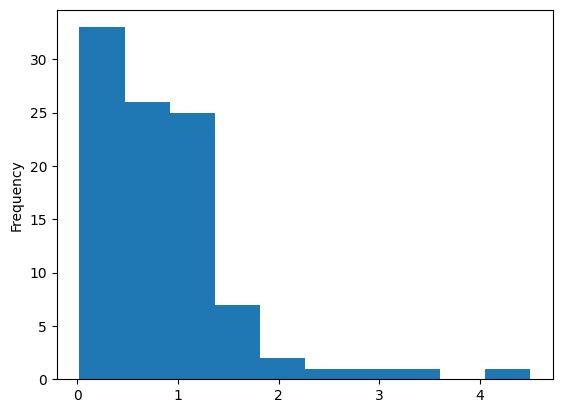

In [66]:
error_ratio.plot.hist()

In [67]:
error_ratio.sort_values()

team
FRA    0.022472
CAN    0.048387
NZL    0.063492
RUS    0.082353
ITA    0.121429
         ...   
MAR    2.000000
EGY    2.400000
HKG    3.000000
POR    3.333333
AUT    4.500000
Length: 97, dtype: float64